In [1]:
import sys
sys.path.append("..")

import pickle

from src.environments import *
from src.agents import *
from src.agent_utils import *

## We will test on the LET environment with 3 rooms and 1 bandit, so that it is easy to plot

In order to reproduce these results, one needs to add the line 
```{python}
np.random.seed(self.t)
```
to the src/environments.py, in class Agent, function step(self, a), after the comment: #Get reward

In [2]:
env = CorridorMAB.default(num_rooms    = 3,
                          num_bandits  = 1,
                          reward_distrib_params = [[-1,1], [-2,1], [3,1]],
                          move_penalty = -5)

In [3]:
def define_exploration_tactic(env, n_each_bandit = 40, n_each_room = 8):
    '''
    This function spits out a list of actions 
    that focuses only on exploring the environment

    The action list will explore each action the same number of times in each state
    '''

    num_rooms = env.num_rooms
    actions   = env._actions

    action_list = []
    
    for i in range(num_rooms-1):
        for a in actions[:-2]:
            action_list.extend([a]*n_each_bandit)
        action_list.append(int(actions[-1]))
    
    # Now we reached final room
    for a in actions[:-2]:
        action_list.extend([a]*n_each_bandit)
    
    for i in range(n_each_room):
        action_list.extend([int(actions[-2])]*3)
        action_list.extend([int(actions[-1])]*3)
    
    return action_list

def define_random_exploration_tactic(env, lenght = 500):

    actions = env._actions
    return np.random.choice(actions, size = lenght)

In [4]:
#with open('good_action_list3.pkl', 'wb') as f:
#    pickle.dump(exploration_tactic, f)

In [6]:
len_episode = 300
new_tactic  = False

if new_tactic is True:
    exploration_tactic = define_random_exploration_tactic(env, len_episode)
else:
    with open('good_action_list3.pkl', 'rb') as f:
        exploration_tactic = pickle.load(f)

spl = SimplePlotter('test_vars3',
                    env,
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'EUB', 
                                          gamma =  0.98,
                                          action_list = exploration_tactic), 
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'EUDV', 
                                          gamma =  0.98,
                                          action_list = exploration_tactic),
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'UBE', 
                                          gamma =  0.98,
                                          action_list = exploration_tactic),
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'monte_carlo',
                                          Q_method_params = 500,
                                          name = 'monte_carlo', 
                                          gamma =  0.98,
                                          action_list = exploration_tactic))

spl.run_experiments(len_episode, 1)

100%|██████████| 300/300 [00:03<00:00, 95.06it/s]


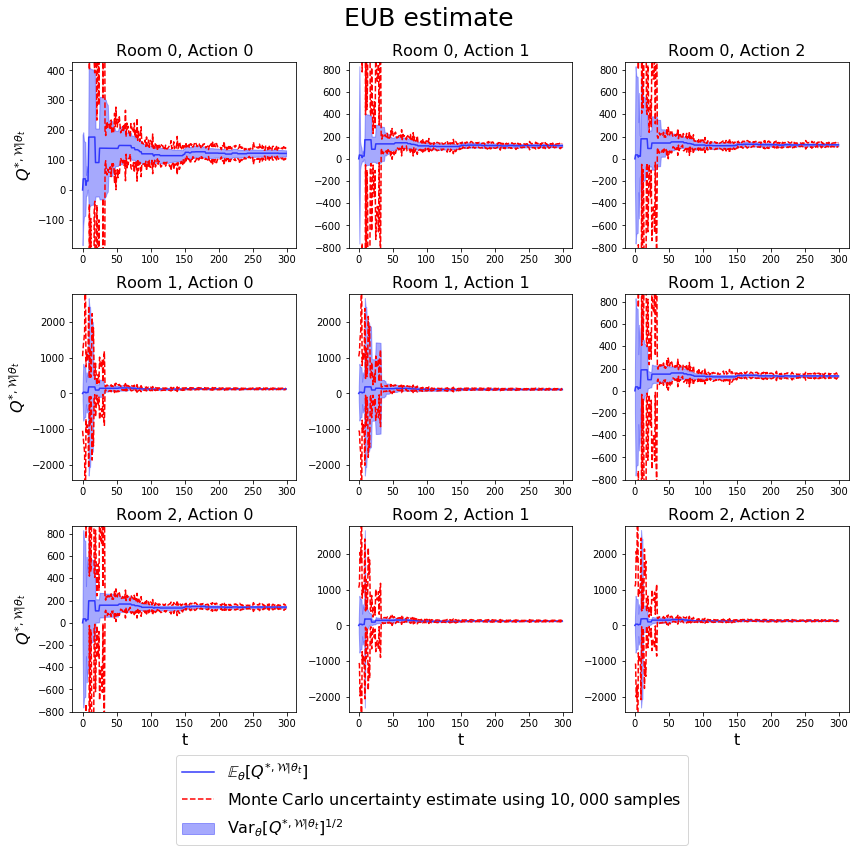

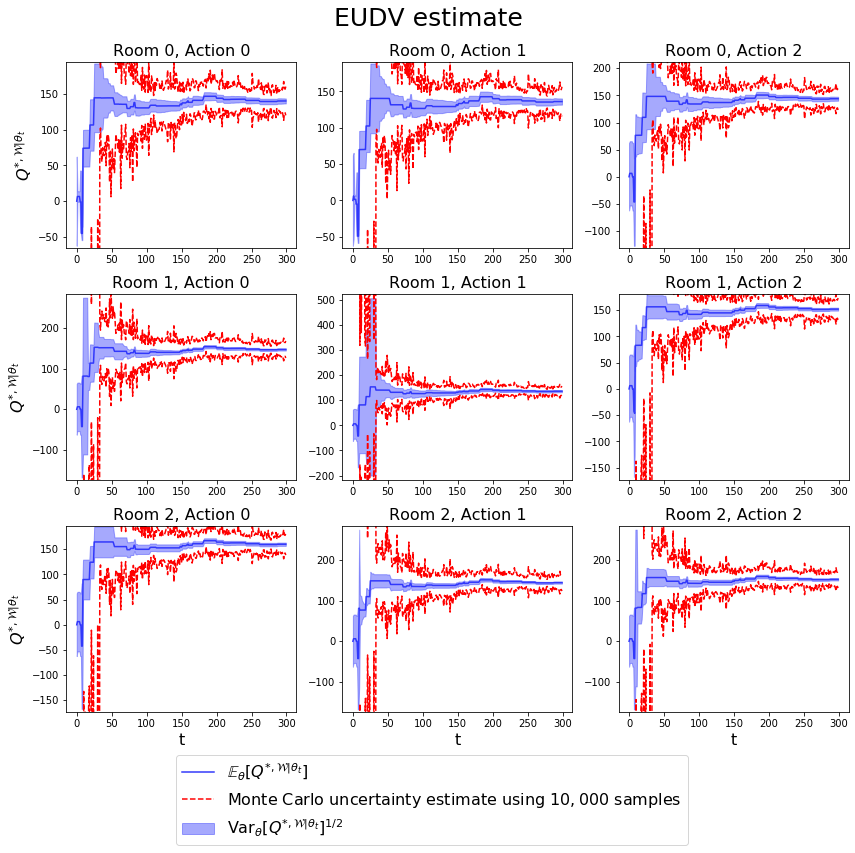

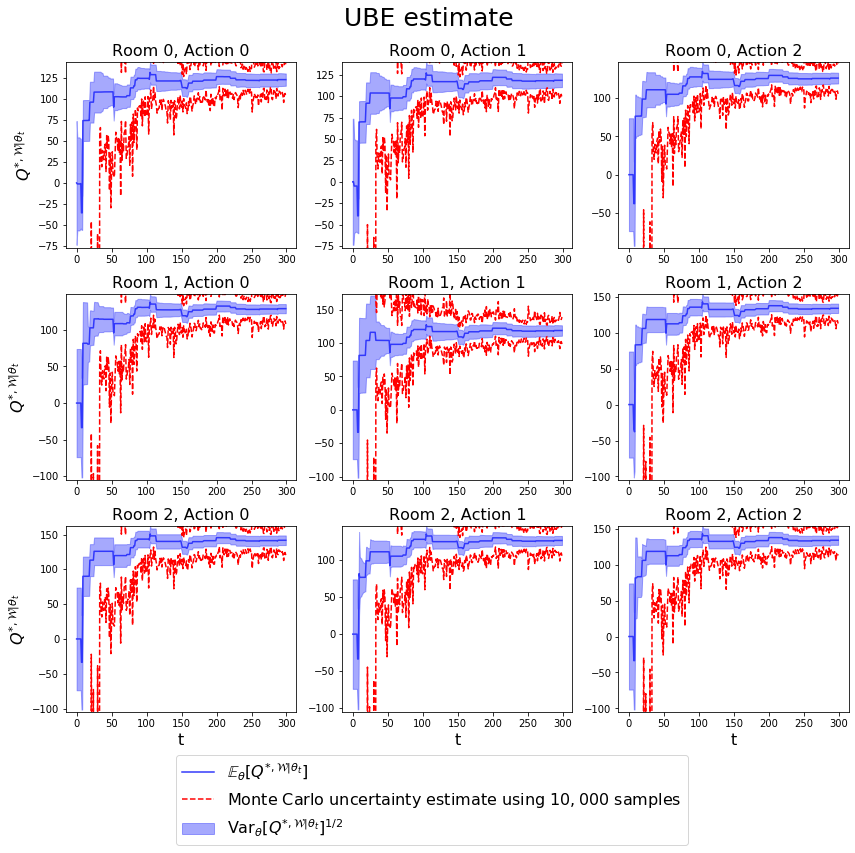

In [7]:
figs_compare = spl.plot_Q_u_comparison()

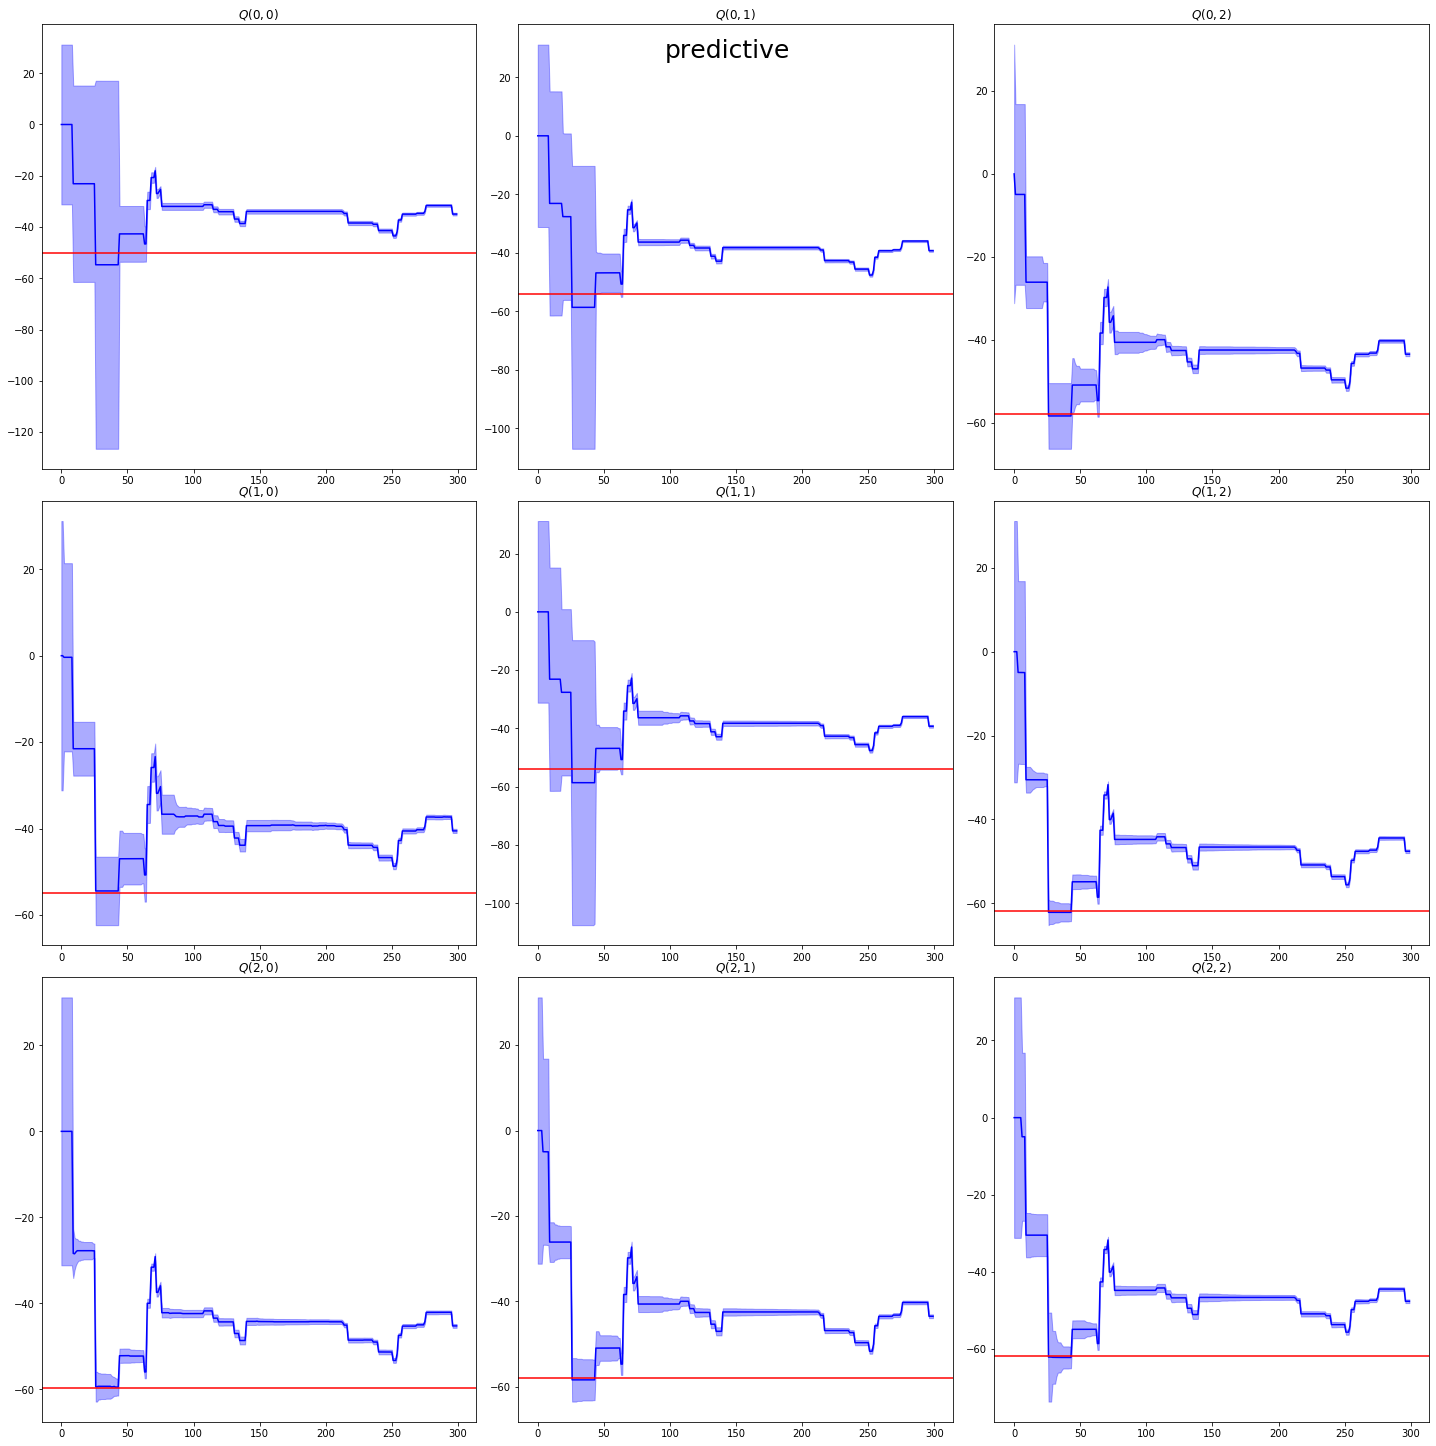

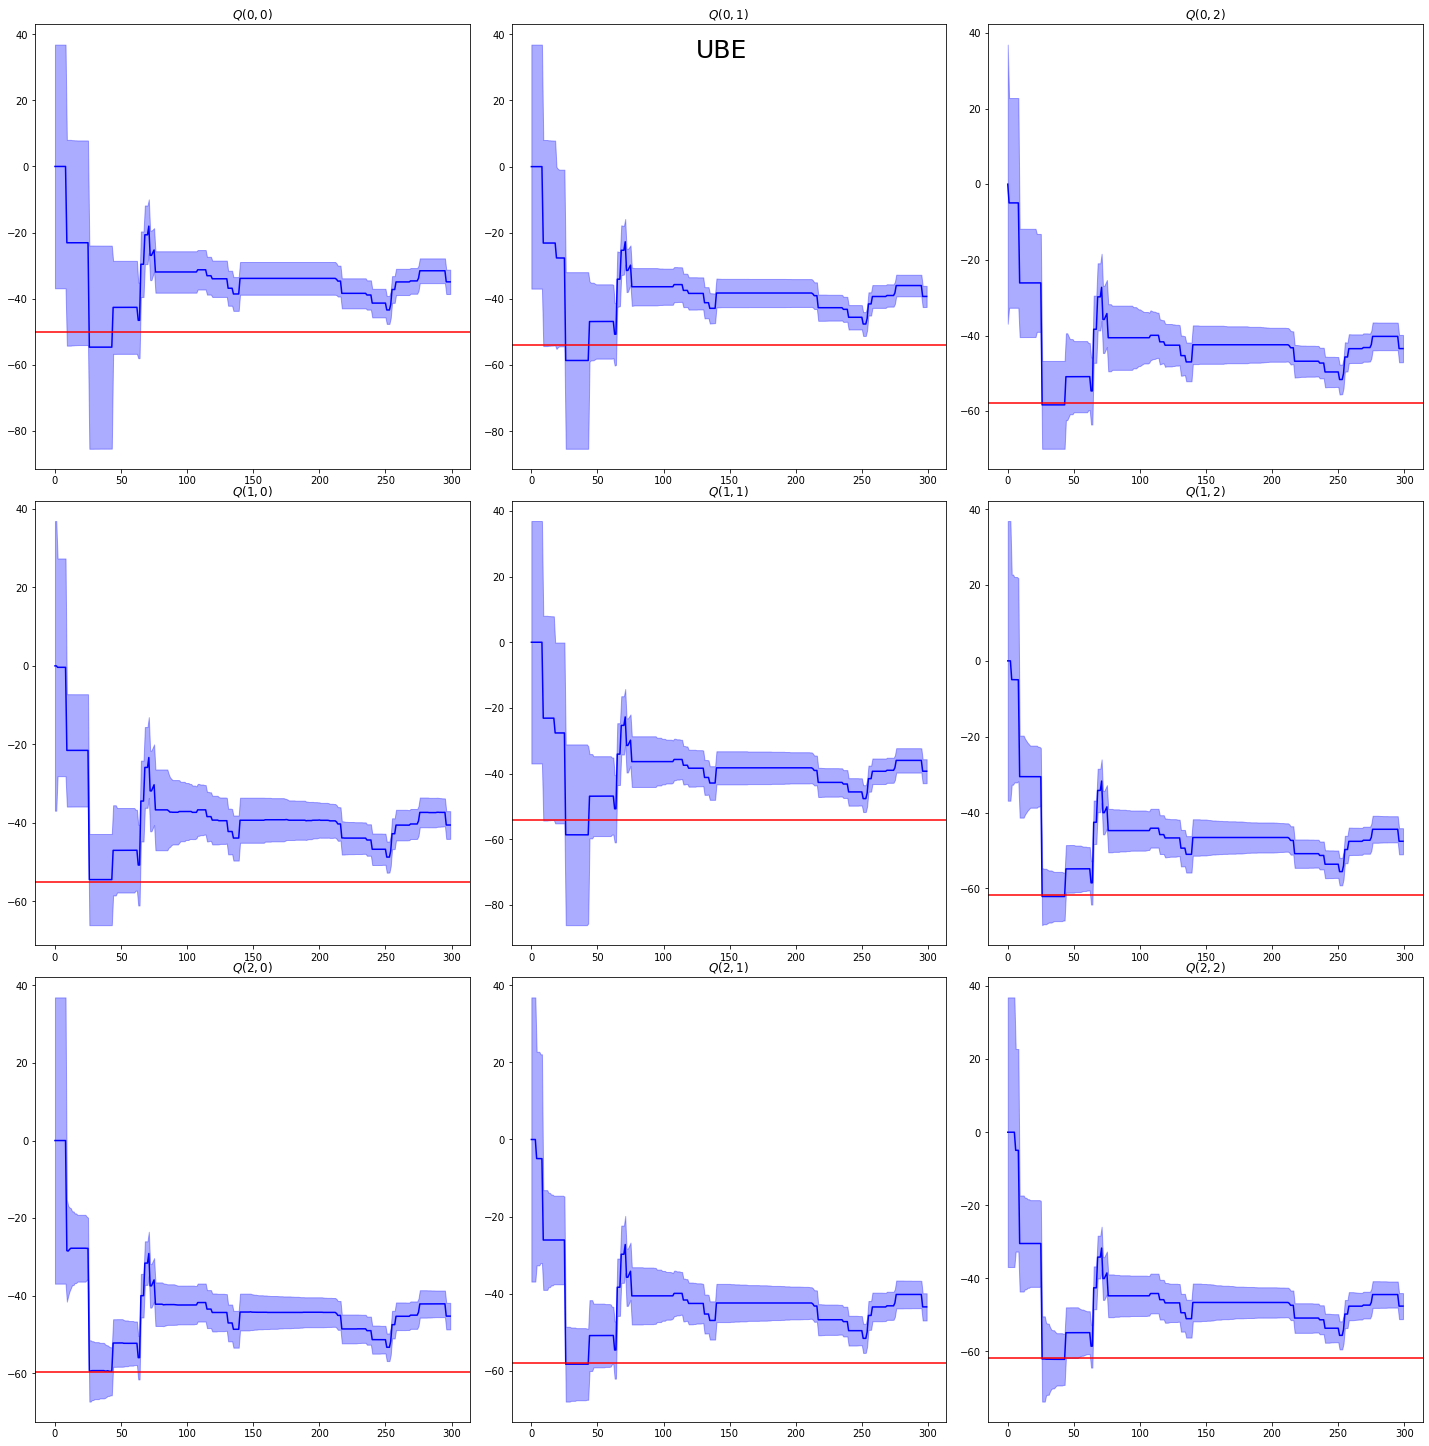

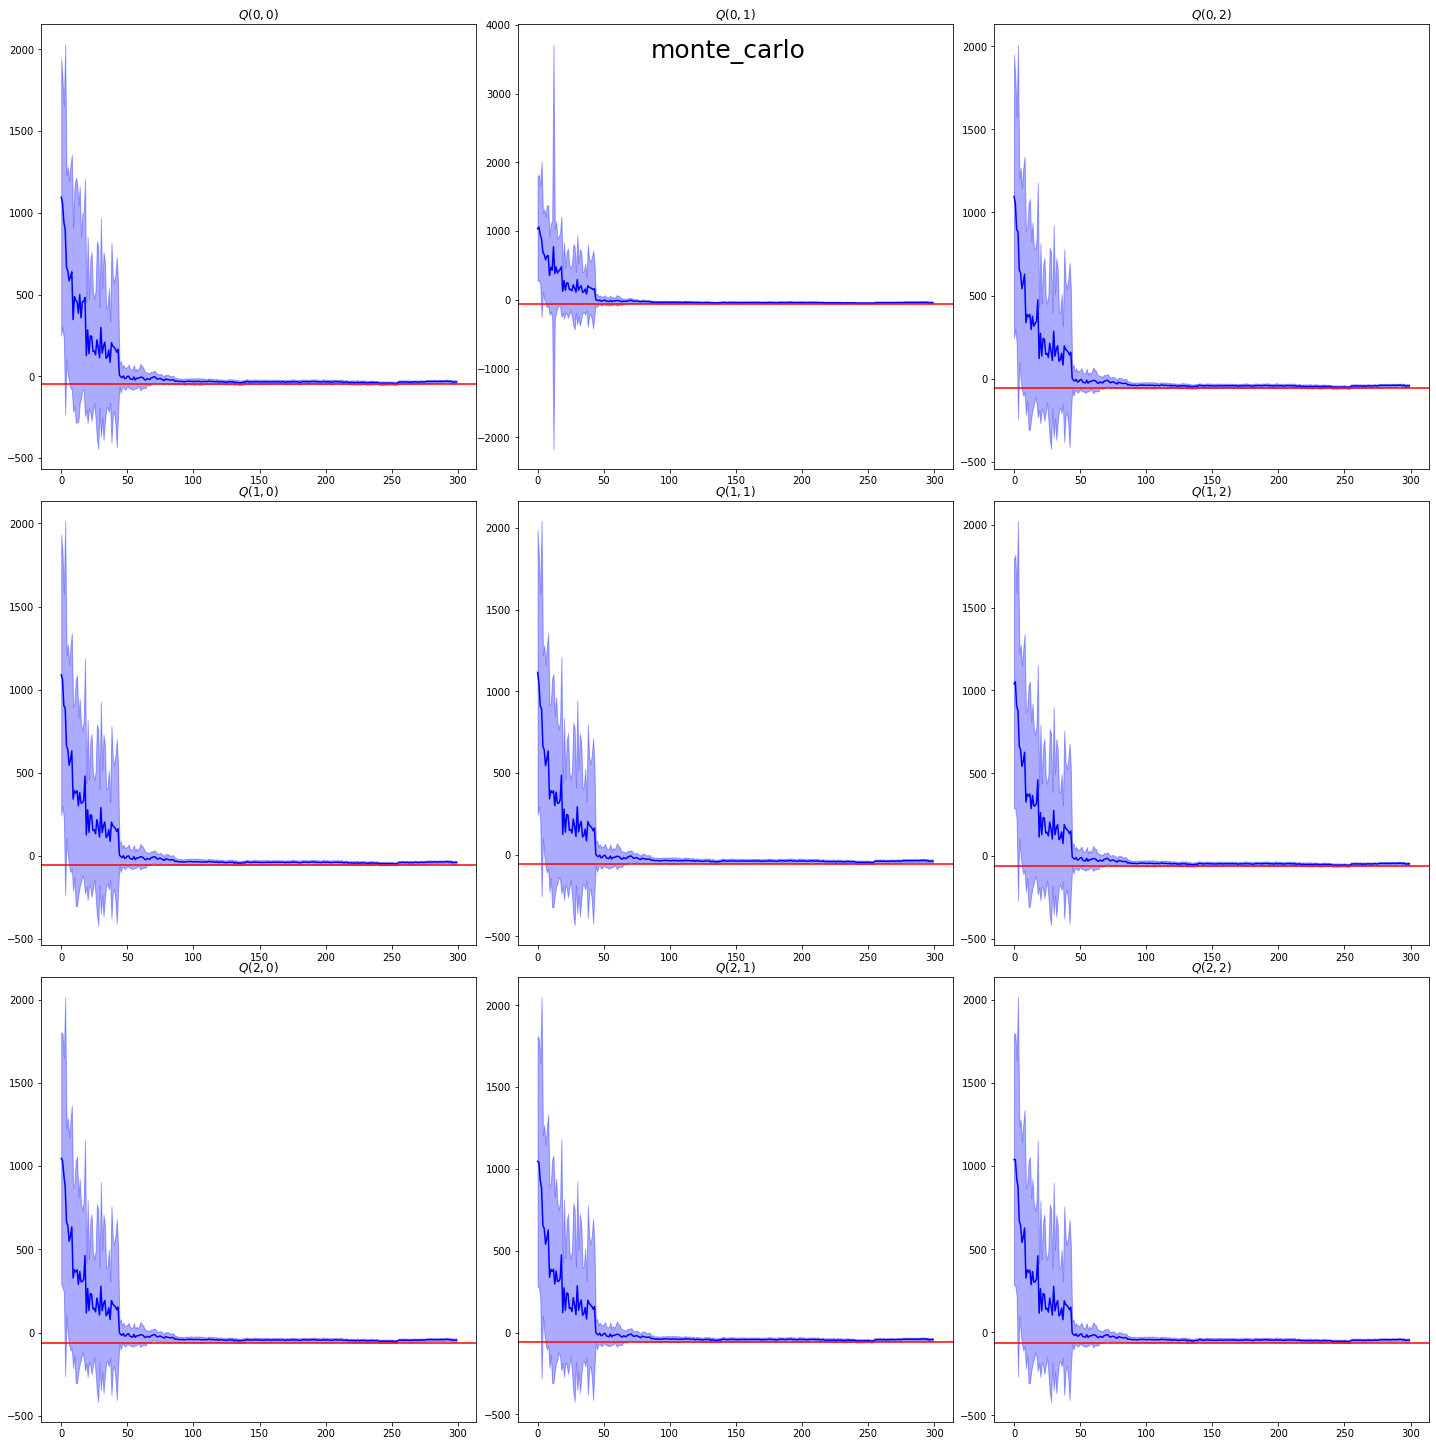

In [6]:
spl.plot_Q_u()

In [15]:
spl.monte_carlo.logger['u'][0]

array([[614276.30396264, 610803.32419179, 607807.17653488,
        618421.53832019],
       [611865.72682389, 602113.23104782, 606991.57434501,
        607597.85633024],
       [614157.74816495, 613485.15825697, 615104.73505211,
        613390.55495443],
       [614011.59171366, 615462.01572172, 603078.19746659,
        606113.91515004]])